In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from IPython.display import display, HTML

plt.rcParams["figure.figsize"] = (20,3)

In [2]:
tmax = pd.read_csv("new_england_tmax.csv", index_col = "date", usecols=["date","measurement"])
tavg = pd.read_csv("new_england_tavg.csv", index_col = "date", usecols=["date","measurement"])
tmin = pd.read_csv("new_england_tmin.csv", index_col = "date", usecols=["date","measurement"])
prcp = pd.read_csv("new_england_prcp.csv", index_col = "date", usecols=["date","measurement"])


All the values seem reasonable, both the min and max are within expected range

In [3]:
display(tmax["measurement"].describe())
display(tavg["measurement"].describe())
display(tmin["measurement"].describe())

count    25933.000000
mean        12.046819
std         10.990996
min        -20.830000
25%          2.950000
50%         12.510000
75%         21.870000
max         35.940000
Name: measurement, dtype: float64

count    25933.000000
mean         6.298558
std         10.503297
min        -25.030000
25%         -1.740000
50%          6.890000
75%         15.510000
max         27.740000
Name: measurement, dtype: float64

count    25933.000000
mean         0.550247
std         10.285318
min        -32.560000
25%         -6.530000
50%          1.170000
75%          9.120000
max         20.830000
Name: measurement, dtype: float64

I probably would have expected the values to be normally distributed, interesting to see the 2 peaks
I guess this shows the seasons are somewhat binary, with a relatively small amount of in-between days?

<AxesSubplot:ylabel='Density'>

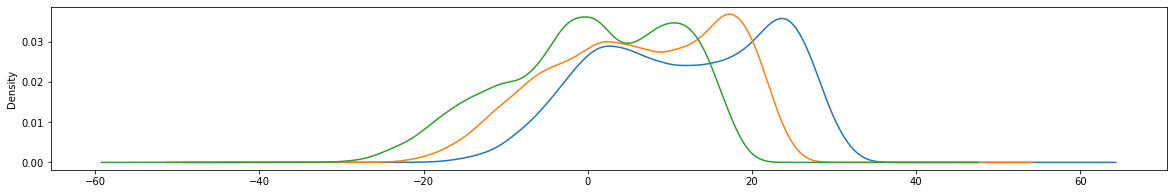

In [4]:
tmax["measurement"].plot(kind="kde")
tavg["measurement"].plot(kind="kde")
tmin["measurement"].plot(kind="kde")

Lets plot the distribution of the mean annual min, max and avg


<AxesSubplot:ylabel='Density'>

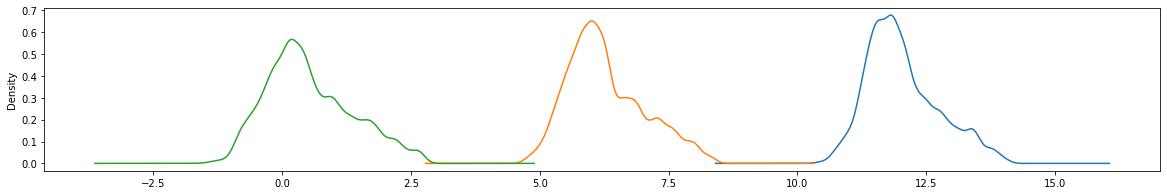

In [5]:
tmax["measurement"].rolling(365).mean().dropna().plot(kind="kde")
tavg["measurement"].rolling(365).mean().dropna().plot(kind="kde")
tmin["measurement"].rolling(365).mean().dropna().plot(kind="kde")

Now lets take a look at precipitation
the rolling annual mean is  1148 and the daily mean is 3.15
The top 75% is only a touch higher at 3.6
This seams to indicate the rainfall is rather steady, with relatively few downpours


In [6]:
rolling_sum = prcp["measurement"].rolling(365).sum().dropna()
display(rolling_sum.mean())
prcp["measurement"].describe()

1148.1556576322891

count    25933.000000
mean         3.148285
std          5.877930
min          0.000000
25%          0.010000
50%          0.540000
75%          3.570000
max         96.240000
Name: measurement, dtype: float64

clearly it tends to rain in small amounts

<AxesSubplot:ylabel='Density'>

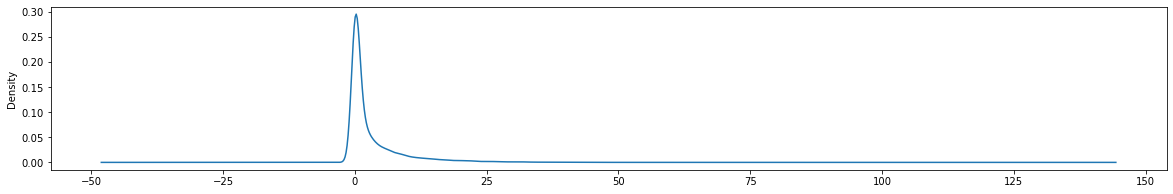

In [7]:
prcp["measurement"].plot(kind="kde")

It looks like the total annual rainfall is normally distributed with a mean of around 1150mm

1148.1556576322891

<AxesSubplot:ylabel='Density'>

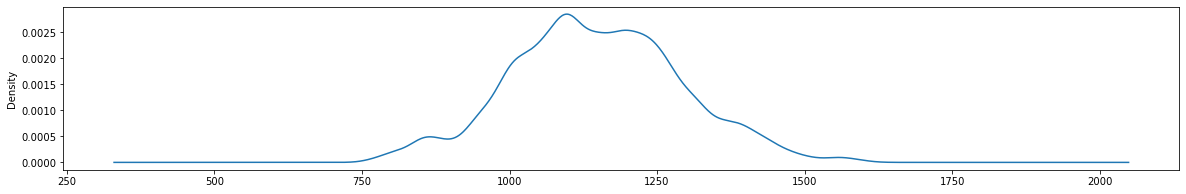

In [8]:
rolling_sum = prcp["measurement"].rolling(365).sum().dropna()
display(rolling_sum.mean())
rolling_sum.plot(kind="kde")

You can edit the start and end dates to get the view you like on the data

In [9]:
start = "2000-01-01"
end = "2006-01-01"

# Variables on y axis
# you can add, edit or remove the rolling mean as required
w = tmax["measurement"].loc[start:end]#.rolling(30).mean().dropna()
y = tavg["measurement"].loc[start:end]#.rolling(30).mean().dropna()
z = tmin["measurement"].loc[start:end]#.rolling(30).mean().dropna()
a = prcp["measurement"].loc[start:end]#.rolling(30).mean().dropna()

# Not sure if volatility is the best word to describe this, we want to see the variance between max and min 
volatility = tmax["measurement"].loc[start:end] - tmin["measurement"].loc[start:end]
volatility = volatility.rolling(90).mean().dropna()


# X axis takes date
x = w.index



volatility

date
2000-03-30    11.498889
2000-03-31    11.480667
2000-04-01    11.465111
2000-04-02    11.487333
2000-04-03    11.474556
                ...    
2005-12-28     9.157000
2005-12-29     9.129111
2005-12-30     9.053667
2005-12-31     9.019222
2006-01-01     8.925000
Name: measurement, Length: 2104, dtype: float64

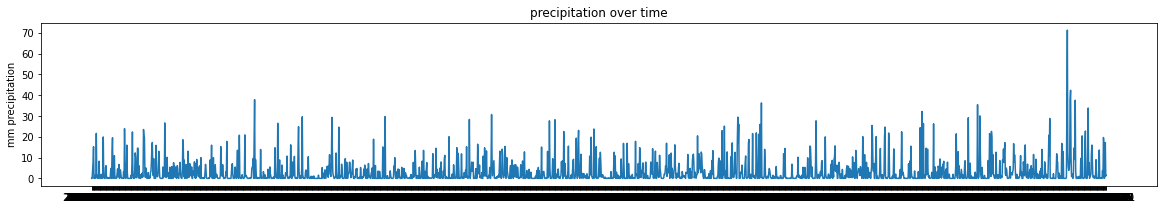

In [10]:
plt.plot(x, a)
plt.ylabel("mm precipitation")
plt.title("precipitation over time")
plt.show()

Text(0.5, 1.0, 'min and max temp over time')

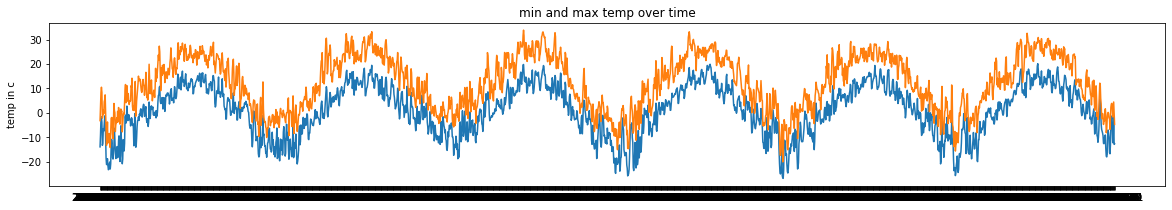

In [11]:
plt.plot(x, z, w)
plt.ylabel("temp in c")
plt.title("min and max temp over time")

<AxesSubplot:xlabel='date'>

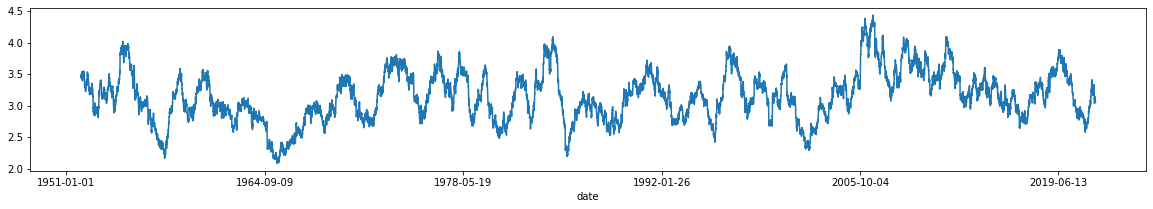

In [12]:
prcp["measurement"].rolling(365).mean().plot()

In [13]:
volatility = w - y


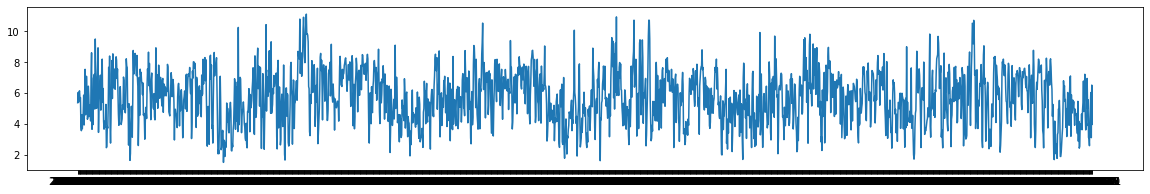

In [14]:
plt.plot(volatility)

We are going to try decompose the data into a season, trend and residual. these could potentially aid the ML model 

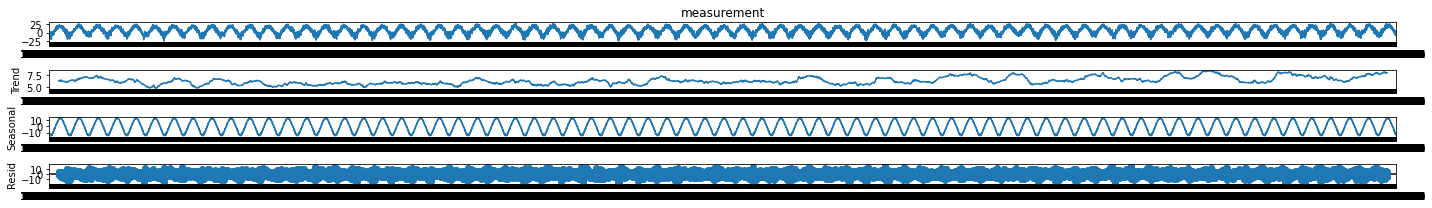

In [15]:
# Note, this takes quite some time to run 
#you can instead just load the data from the respective csv files if you want

decomposition = sm.tsa.seasonal_decompose(tavg["measurement"], period = 365, model='additive')
fig = decomposition.plot()


<class 'pandas.core.series.Series'>


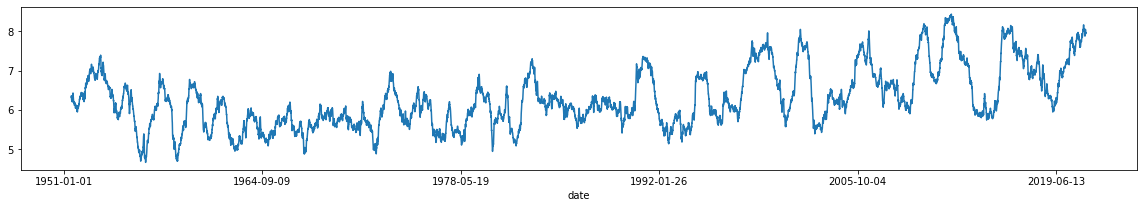

In [21]:
trend = decomposition.trend
trend.plot()
print(type(trend))


In [22]:
# no need to run this if you already have the file
#trend.to_csv("tavg_trend_new_england.csv")


<AxesSubplot:xlabel='date'>

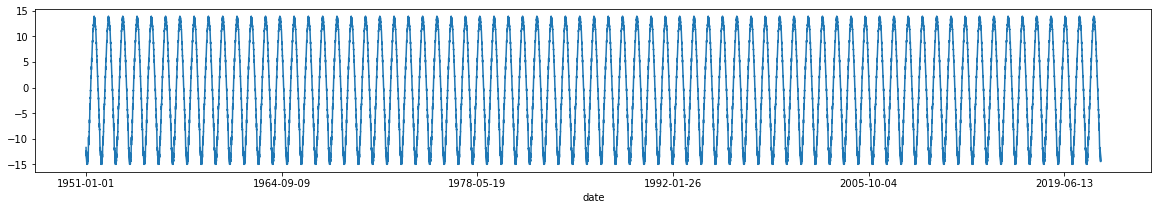

In [23]:
season = decomposition.seasonal
season.plot()
# no need to run this if you already have the file
#season.to_csv("tavg_season_new_england.csv")

<AxesSubplot:xlabel='date'>

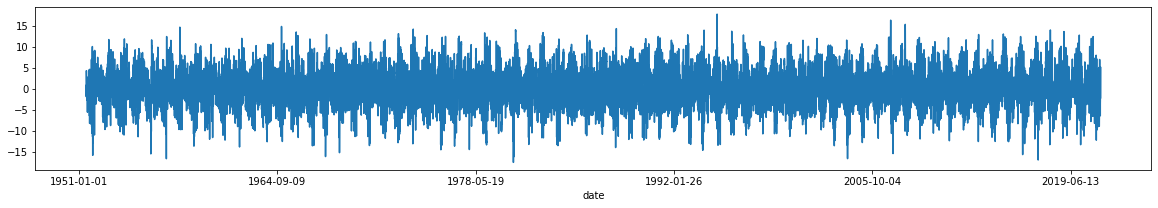

In [24]:
resid = decomposition.resid
resid.plot()
# no need to run this if you already have the file
#resid.to_csv("tavg_resid_new_england.csv")

In [25]:
# this doesn't seem to work that well so i'll ignore it

# my_stl = STL(endog=prcp["measurement"])


# stl = my_stl
# res = stl.fit()
# fig = res.plot()